In [1]:
import pandas as pd

## Read data

In [27]:
df = pd.read_csv("neural-turing-machines\candle.csv")
df = df[df["asset_id"] == "USDC-GBP"]
df.drop(["id", "asset_id"], axis=1, inplace=True)
df = df.sort_values("time")
df.set_index("time", inplace=True)

In [28]:
df.head()

,low,high,open_value,close_value,volume
time,,,,,
2022-02-20 15:55:00+00,0.734,0.736,0.736,0.734,25037.62
2022-02-20 16:15:00+00,0.735,0.735,0.735,0.735,1052.25
2022-02-20 16:24:00+00,0.736,0.736,0.736,0.736,42.49
2022-02-20 16:35:00+00,0.736,0.736,0.736,0.736,5960.17
2022-02-20 16:36:00+00,0.736,0.737,0.736,0.737,7436.68


## Preprocess data

### Stationary

In [29]:
# Stationarity = Good, because past data is more similar to future data, making forecasts easier.

df['open_value'] = df['open_value'].pct_change()
df['high'] = df['high'].pct_change()
df['low'] = df['low'].pct_change()
df['close_value'] = df['close_value'].pct_change()

df['volume'] = df['volume'].pct_change()

In [30]:
df.head()

,low,high,open_value,close_value,volume
time,,,,,
2022-02-20 15:55:00+00,NaN,NaN,NaN,NaN,NaN
2022-02-20 16:15:00+00,0.001362,-0.001359,-0.001359,0.001362,-0.957973
2022-02-20 16:24:00+00,0.001361,0.001361,0.001361,0.001361,-0.959620
2022-02-20 16:35:00+00,0.000000,0.000000,0.000000,0.000000,139.272299
2022-02-20 16:36:00+00,0.000000,0.001359,0.000000,0.001359,0.247730


### Normalize

In [31]:
# Normalize price columns
min_return = min(df[['open_value', 'high', 'low', 'close_value']].min(axis=0))
max_return = max(df[['open_value', 'high', 'low', 'close_value']].max(axis=0))

# Min-max normalize price columns (0-1 range)
df['open_value'] = (df['open_value'] - min_return) / (max_return - min_return)
df['high'] = (df['high'] - min_return) / (max_return - min_return)
df['low'] = (df['low'] - min_return) / (max_return - min_return)
df['close_value'] = (df['close_value'] - min_return) / (max_return - min_return)


# Normalize volume column
min_volume = df['volume'].min(axis=0)
max_volume = df['volume'].max(axis=0)

# Min-max normalize volume columns (0-1 range)
df['volume'] = (df['volume'] - min_volume) / (max_volume - min_volume)

<AxesSubplot:xlabel='time'>

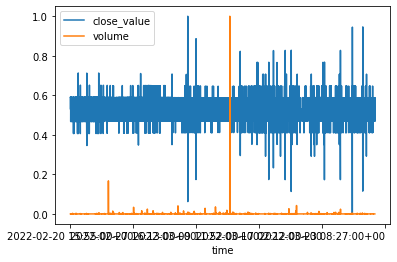

In [33]:
df[["close_value", "volume"]].plot()

In [34]:
times = sorted(df.index.values)
last_10pct = sorted(df.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(df.index.values)[-int(0.2*len(times))] # Last 20% of series

df_train = df[(df.index < last_20pct)]  # Training data are 80% of total data
df_val = df[(df.index >= last_20pct) & (df.index < last_10pct)]
df_test = df[(df.index >= last_10pct)]

In [39]:
df_test

,low,high,open_value,close_value,volume
time,,,,,
2022-03-27 23:12:00+00,0.528760,0.528760,0.528760,0.528760,2.003396e-06
2022-03-27 23:28:00+00,0.588053,0.528760,0.588053,0.528760,6.227805e-05
2022-03-27 23:43:00+00,0.528760,0.528760,0.528760,0.528760,7.775483e-05
2022-03-28 00:17:00+00,0.469544,0.528760,0.469544,0.528760,1.875867e-06
2022-03-28 00:51:00+00,0.588053,0.528760,0.588053,0.528760,4.056504e-07
...,...,...,...,...,...
2022-04-01 22:28:00+00,0.528760,0.469854,0.469854,0.528760,3.371379e-06
2022-04-01 22:29:00+00,0.587742,0.587742,0.587742,0.587742,7.549107e-06
2022-04-01 22:47:00+00,0.469854,0.528760,0.528760,0.469854,1.184964e-04


In [40]:
from time2vec import Time2Vec

In [ ]:
model = Time2Vec(in_features=5, out_features=30)